### Data Manipulation and Analysis with Pandas
Data Manipulation and analysis are key task in any data science or data analysis project. Pandas provide a wide range of functions for data manipulation and analysis making it easier to clean, transform, and extract insight from data. In this lesson , we will cover various data manipulation and analysis technique using pandas

##### axis rule
0---> goes down

1---> goes across


In [1]:
import pandas as pd
df=pd.read_csv("data.csv")
df.head(5)

,Date,Category,Value,Product,Sales,Region
0,2023-01-01,A,28.0,Product1,754.0,East
1,2023-01-02,B,39.0,Product3,110.0,North
2,2023-01-03,C,32.0,Product2,398.0,East
3,2023-01-04,B,8.0,Product1,522.0,East
4,2023-01-05,B,26.0,Product3,869.0,North


In [2]:
df.dtypes

Date         object
Category     object
Value       float64
Product      object
Sales       float64
Region       object
dtype: object

#### Filter

In [3]:
import pandas as pd

df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 32, 45, 22],
    'Score': [85, 90, 78, 92]
})
display(df)
# Filter for Age > 30
filtered_df = df[df['Age'] > 30]
display(filtered_df)

,Name,Age,Score
0,Alice,25,85
1,Bob,32,90
2,Charlie,45,78
3,David,22,92


,Name,Age,Score
1,Bob,32,90
2,Charlie,45,78


#### Nunique and unique


In [4]:
df2=df=pd.read_csv("data.csv")
#This function returns an array of the actual unique values found in a column. It is similar to the set() function in Python
display(df2["Product"].unique())# takes one column series as input

display(df2.nunique())# Gives number of unique values in each column

array(['Product1', 'Product3', 'Product2'], dtype=object)

Date        50
Category     3
Value       41
Product      3
Sales       45
Region       4
dtype: int64

#### Drop Duplicates

In [5]:
import pandas as pd

df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Alice', 'Alice'],
    'City': ['London', 'Paris', 'London', 'London'],
    'Score': [85, 90, 85, 10]
})

# Removes the 3rd row (Alice, London, 85) because it's an exact match of the 1st
df_clean = df.drop_duplicates()

display(df_clean)

#With subset most powerful
df_clean2 = df.drop_duplicates(subset=['Name', 'City'])
'''When Pandas finds a duplicate, you have to tell it which one to save:

keep='first' (Default): Keeps the first one it sees and deletes the rest.

keep='last': Keeps the most recent one (useful for logs/history).

keep=False: Deletes all occurrences of the duplicate (useful for finding unique entries that never repeated).
'''
df_clean3 = df.drop_duplicates(subset=['Name', 'City'],keep=False)
display(df_clean2)
display(df_clean3)

,Name,City,Score
0,Alice,London,85
1,Bob,Paris,90
3,Alice,London,10


,Name,City,Score
0,Alice,London,85
1,Bob,Paris,90


,Name,City,Score
1,Bob,Paris,90


#### Replace

In [6]:
import pandas as pd
import numpy as np

df_r = pd.DataFrame({
    'Status': ['Pending', 'Success', 'Error', 'Pending'],
    'Score': [10, 20, -999, 15]
})

# Replace 'Pending' with 'Waiting'
df_r['Status'] = df_r['Status'].replace('Pending', 'Waiting')

# Replace a specific "sentinel" value with NaN
df_r['Score'] = df_r['Score'].replace(-999, np.nan)
display(df_r)       
# Multi-replace in one go
mapping = {
    'Success': 'Completed',
    'Error': 'Failed',
    'Waiting': 'In Progress'
}
df_r['Status'] = df_r['Status'].replace(mapping)
display(df_r)

# Replace 10 with 100, and 20 with 200
df_r['Score'] = df_r['Score'].replace([10, 20], [100, 200])
display(df)

df_r = pd.DataFrame({'Phone': ['555-123', '555-456', 'Unknown']})

# Regex Remove the '555-' prefix
df_r['Phone'] = df_r['Phone'].replace(r'555-', '', regex=True)
display(df_r)  

,Status,Score
0,Waiting,10.0
1,Success,20.0
2,Error,NaN
3,Waiting,15.0


,Status,Score
0,In Progress,10.0
1,Completed,20.0
2,Failed,NaN
3,In Progress,15.0


,Name,City,Score
0,Alice,London,85
1,Bob,Paris,90
2,Alice,London,85
3,Alice,London,10


,Phone
0,123
1,456
2,Unknown


#### Handling Missing data

Command	What Axis 1 means in that context	The Result
df.drop(axis=1)	"Follow the axis 1 direction and delete what you find."	The entire Column is gone.
df.any(axis=1)	"Follow the axis 1 direction and search for a True value."	You get a Row-by-row report.

In [7]:
#Handling Missing data

df.isnull() # will give me true whereever there is null
#In pandas, df.isnull().any(axis=1) returns row-wise information because axis=1 so any operation is applied across columns
df.isnull().any(axis=1) # will give row which will have true
df.isnull().any() # will give row which will have true

Name     False
City     False
Score    False
dtype: bool

In [8]:
df.isnull() # will give me true whereever there is null
#In pandas, df.sum().any(axis=1) returns row-wise information because axis=1 so any operation is applied across columns
df.isnull().sum(axis=1) # will give row which will have true
df.isnull().sum() # will give row which will have true

Name     0
City     0
Score    0
dtype: int64

#### Filling with zero

In [9]:

df_filled=df.fillna(0)
df_filled.head(5)

,Name,City,Score
0,Alice,London,85
1,Bob,Paris,90
2,Alice,London,85
3,Alice,London,10


#### Filling with mean

In [10]:
df=pd.read_csv("data.csv")
df_filled_mean=df
#We can apply fill na on purticular column here we are setting fill na on sales using its mean
df_filled_mean["Sales_mean"]=df["Sales"].fillna(df["Sales"].mean())
df_filled_mean.head(5)

,Date,Category,Value,Product,Sales,Region,Sales_mean
0,2023-01-01,A,28.0,Product1,754.0,East,754.0
1,2023-01-02,B,39.0,Product3,110.0,North,110.0
2,2023-01-03,C,32.0,Product2,398.0,East,398.0
3,2023-01-04,B,8.0,Product1,522.0,East,522.0
4,2023-01-05,B,26.0,Product3,869.0,North,869.0


#### Column Transformation

In [11]:
#Change the Column_name
df=df.rename(columns= {"Date":"Sales Date"})
df.head(5)

,Sales Date,Category,Value,Product,Sales,Region,Sales_mean
0,2023-01-01,A,28.0,Product1,754.0,East,754.0
1,2023-01-02,B,39.0,Product3,110.0,North,110.0
2,2023-01-03,C,32.0,Product2,398.0,East,398.0
3,2023-01-04,B,8.0,Product1,522.0,East,522.0
4,2023-01-05,B,26.0,Product3,869.0,North,869.0


#### Changing datatype

In [12]:

df["Value_new"]=df["Sales"].fillna(df["Value"].mean()).astype(str)
df.head(5)

,Sales Date,Category,Value,Product,Sales,Region,Sales_mean,Value_new
0,2023-01-01,A,28.0,Product1,754.0,East,754.0,754.0
1,2023-01-02,B,39.0,Product3,110.0,North,110.0,110.0
2,2023-01-03,C,32.0,Product2,398.0,East,398.0,398.0
3,2023-01-04,B,8.0,Product1,522.0,East,522.0,522.0
4,2023-01-05,B,26.0,Product3,869.0,North,869.0,869.0


#### Increase value by 10 percent

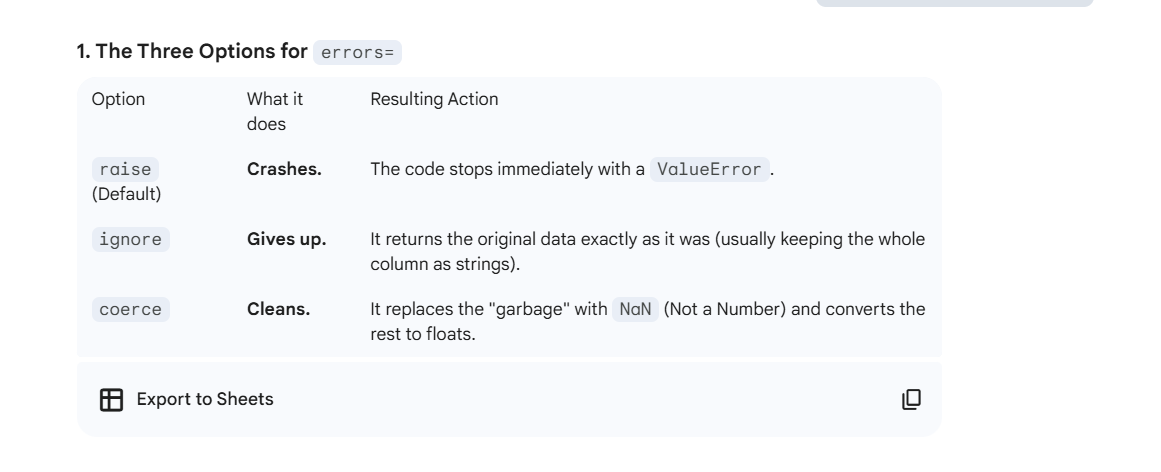

In [13]:

# You can apply custom function using lambda
df["New Value"]=df["Value"].apply(lambda m: m*1.1)
df["Value"] = pd.to_numeric(df["Value"], errors='coerce')
df["New Value2"]=df["Value"]*1.1
display(df.head(5))
df["Adjust_value"]=df.apply(lambda row: row.get("Value")*2 if row.get("Region")=="East" else row.get("Value")*1.5, axis=1)
display(df.head(5))

#Do in vectorized way

import pandas as pd
import numpy as np

#multiple conditions example
# Sample Data
df_prod = pd.DataFrame({
    'Product': ['Product1', 'Product2', 'Product3', 'Product4'],
    'Value': [100, 100, 100, 100]
})

# 1. Define conditions (The "If/Elif" logic)
conditions = [
    (df_prod['Product'] == 'Product1'),
    (df_prod['Product'] == 'Product2'),
    (df_prod['Product'] == 'Product3')
]

# 2. Define the choices (The results)
choices = [
    df_prod['Value'] * 2,    # Product1 gets 2x
    df_prod['Value'] * 1.5,  # Product2 gets 1.5x
    df_prod['Value'] * 1.2   # Product3 gets 1.2x
]

# 3. Apply with a default (The "Else" logic)
# If it's Product4 or anything else, keep the original Value
df_prod['Value'] = np.select(conditions, choices, default=df_prod['Value'])

display(df_prod)
#or 



,Sales Date,Category,Value,Product,Sales,Region,Sales_mean,Value_new,New Value,New Value2
0,2023-01-01,A,28.0,Product1,754.0,East,754.0,754.0,30.8,30.8
1,2023-01-02,B,39.0,Product3,110.0,North,110.0,110.0,42.9,42.9
2,2023-01-03,C,32.0,Product2,398.0,East,398.0,398.0,35.2,35.2
3,2023-01-04,B,8.0,Product1,522.0,East,522.0,522.0,8.8,8.8
4,2023-01-05,B,26.0,Product3,869.0,North,869.0,869.0,28.6,28.6


,Sales Date,Category,Value,Product,Sales,Region,Sales_mean,Value_new,New Value,New Value2,Adjust_value
0,2023-01-01,A,28.0,Product1,754.0,East,754.0,754.0,30.8,30.8,56.0
1,2023-01-02,B,39.0,Product3,110.0,North,110.0,110.0,42.9,42.9,58.5
2,2023-01-03,C,32.0,Product2,398.0,East,398.0,398.0,35.2,35.2,64.0
3,2023-01-04,B,8.0,Product1,522.0,East,522.0,522.0,8.8,8.8,16.0
4,2023-01-05,B,26.0,Product3,869.0,North,869.0,869.0,28.6,28.6,39.0


,Product,Value
0,Product1,200.0
1,Product2,150.0
2,Product3,120.0
3,Product4,100.0


##### applying different aggregation on 2 columns

In [17]:

grouped_df3=df.groupby("Product").agg({"Value":["mean","count"],"Sales":"sum"})

#To set index
#df.set_index('Product',inplace=True)
df.reset_index(inplace=True)
df.head(5)  

,index,Sales Date,Category,Value,Product,Sales,Region,Sales_mean,Value_new,New Value,New Value2,Adjust_value
0,0,2023-01-01,A,28.0,Product1,754.0,East,754.0,754.0,30.8,30.8,56.0
1,1,2023-01-02,B,39.0,Product3,110.0,North,110.0,110.0,42.9,42.9,58.5
2,2,2023-01-03,C,32.0,Product2,398.0,East,398.0,398.0,35.2,35.2,64.0
3,3,2023-01-04,B,8.0,Product1,522.0,East,522.0,522.0,8.8,8.8,16.0
4,4,2023-01-05,B,26.0,Product3,869.0,North,869.0,869.0,28.6,28.6,39.0
